# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

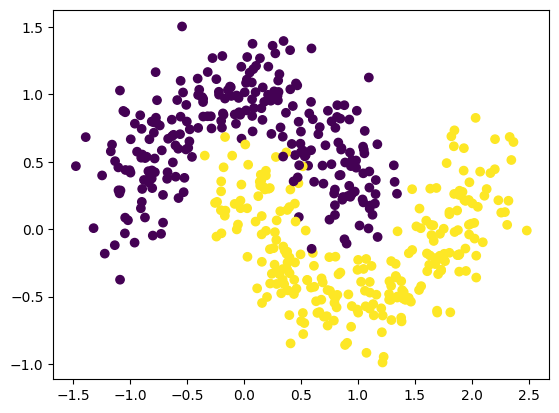

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

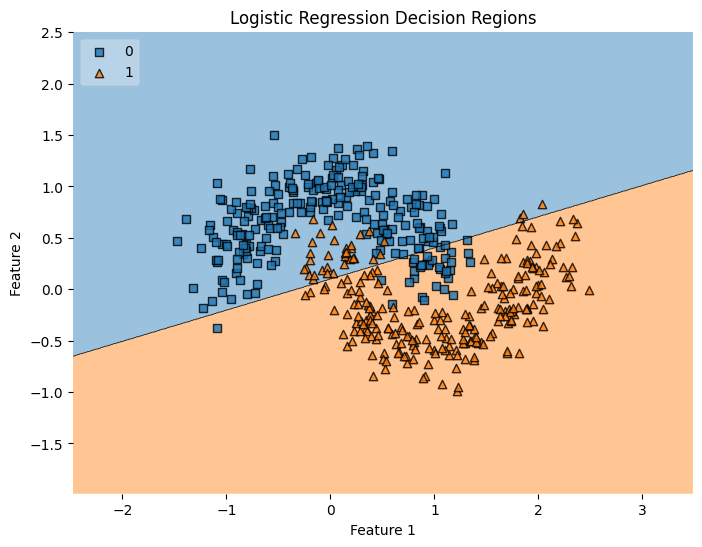

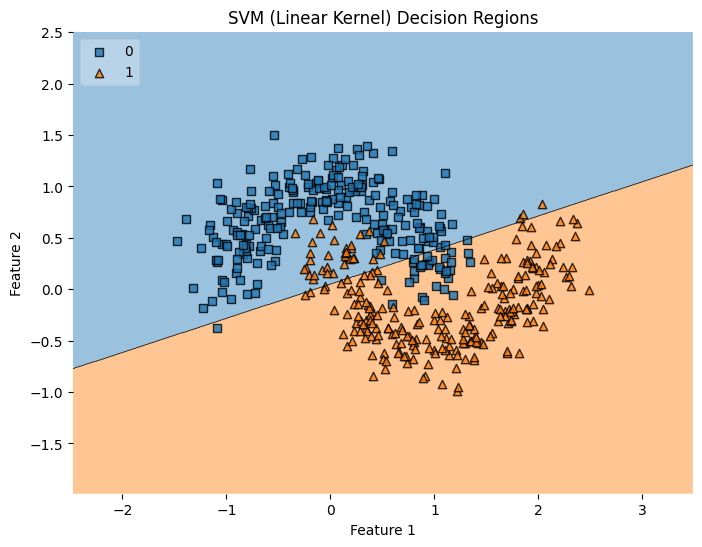

Logistic Regression - Accuracy: 0.8560, F1: 0.8554
SVM (Linear) - Accuracy: 0.8580, F1: 0.8566

Results:
Both Logistic Regression and linear SVM struggle with this non-linearly separable dataset.
The decision boundaries are linear, which cannot properly separate the two moon-shaped classes.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE
# Train models
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

# Function to plot decision regions
def plot_decisions(X, y, estimator, title):
    """Plot decision regions for a given estimator"""
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision regions
plot_decisions(moons_points, moons_labels, lr, 'Logistic Regression Decision Regions')
plot_decisions(moons_points, moons_labels, svm, 'SVM (Linear Kernel) Decision Regions')

# Calculate metrics
from sklearn.metrics import accuracy_score, f1_score

lr_pred = lr.predict(moons_points)
svm_pred = svm.predict(moons_points)

lr_accuracy = accuracy_score(moons_labels, lr_pred)
svm_accuracy = accuracy_score(moons_labels, svm_pred)
lr_f1 = f1_score(moons_labels, lr_pred)
svm_f1 = f1_score(moons_labels, svm_pred)

print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, F1: {lr_f1:.4f}")
print(f"SVM (Linear) - Accuracy: {svm_accuracy:.4f}, F1: {svm_f1:.4f}")

print("\nResults:")
print("Both Logistic Regression and linear SVM struggle with this non-linearly separable dataset.")
print("The decision boundaries are linear, which cannot properly separate the two moon-shaped classes.")


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Testing Polynomial Kernel...
Best params: {'C': 1, 'degree': 3, 'gamma': 'scale'}
Accuracy: 0.9060, F1: 0.9105

Testing RBF Kernel...
Best params: {'C': 100, 'gamma': 1}
Accuracy: 0.9840, F1: 0.9841

Testing Sigmoid Kernel...
Best params: {'C': 1, 'gamma': 0.1}
Accuracy: 0.8460, F1: 0.8457



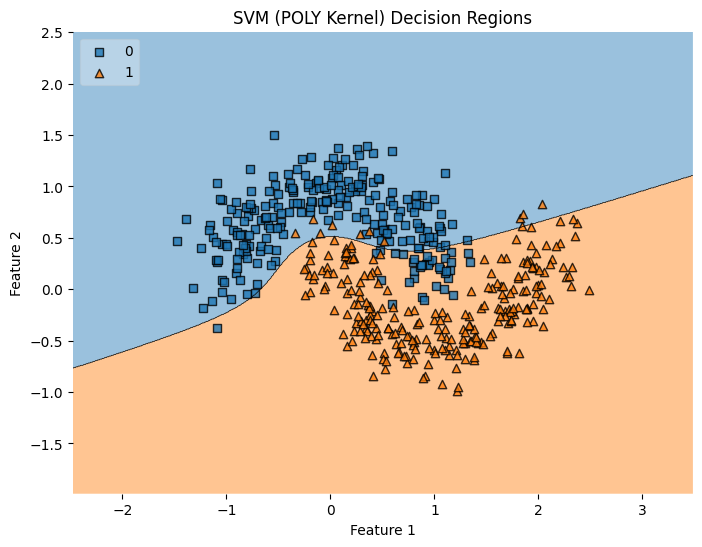

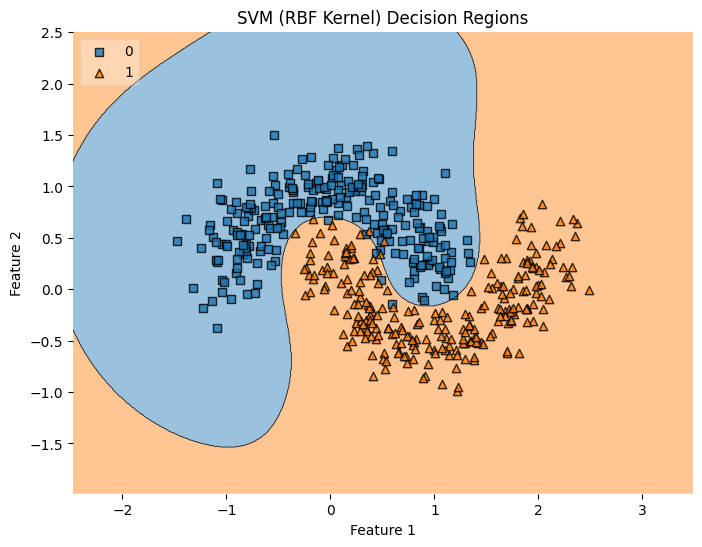

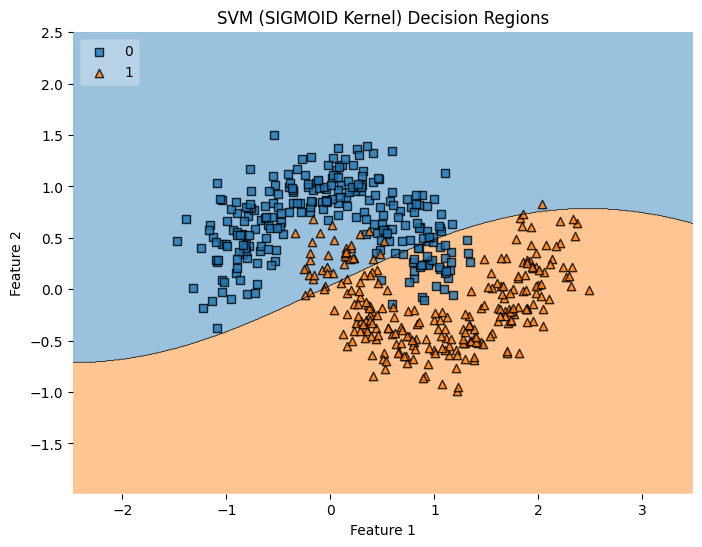

Analysis:
1. Classification quality improved significantly with non-linear kernels.
   - Polynomial (degree=3): F1=0.9105
   - RBF: F1=0.9841
   - Sigmoid: F1=0.8457
2. Decision borders:
   - Polynomial: Creates curved boundaries based on polynomial degree
   - RBF: Creates smooth, flexible boundaries that can handle complex shapes
   - Sigmoid: Creates S-shaped boundaries, less flexible than RBF
3. Degree chosen: 3 - This provides good balance between
   model complexity and generalization. Higher degrees can overfit, lower degrees may underfit.


In [5]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define parameter grids for different kernels
param_grids = {
    'poly': {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    },
    'rbf': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1, 10]
    },
    'sigmoid': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1]
    }
}

best_models = {}
best_params = {}
results = {}

# Test polynomial kernel
print("Testing Polynomial Kernel...")
svm_poly = SVC(kernel='poly', random_state=42)
grid_poly = GridSearchCV(svm_poly, param_grids['poly'], cv=5, scoring='f1', n_jobs=-1)
grid_poly.fit(moons_points, moons_labels)
best_models['poly'] = grid_poly.best_estimator_
best_params['poly'] = grid_poly.best_params_
poly_pred = best_models['poly'].predict(moons_points)
results['poly'] = {
    'accuracy': accuracy_score(moons_labels, poly_pred),
    'f1': f1_score(moons_labels, poly_pred)
}
print(f"Best params: {best_params['poly']}")
print(f"Accuracy: {results['poly']['accuracy']:.4f}, F1: {results['poly']['f1']:.4f}\n")

# Test RBF kernel
print("Testing RBF Kernel...")
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_rbf = GridSearchCV(svm_rbf, param_grids['rbf'], cv=5, scoring='f1', n_jobs=-1)
grid_rbf.fit(moons_points, moons_labels)
best_models['rbf'] = grid_rbf.best_estimator_
best_params['rbf'] = grid_rbf.best_params_
rbf_pred = best_models['rbf'].predict(moons_points)
results['rbf'] = {
    'accuracy': accuracy_score(moons_labels, rbf_pred),
    'f1': f1_score(moons_labels, rbf_pred)
}
print(f"Best params: {best_params['rbf']}")
print(f"Accuracy: {results['rbf']['accuracy']:.4f}, F1: {results['rbf']['f1']:.4f}\n")

# Test sigmoid kernel
print("Testing Sigmoid Kernel...")
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
grid_sigmoid = GridSearchCV(svm_sigmoid, param_grids['sigmoid'], cv=5, scoring='f1', n_jobs=-1)
grid_sigmoid.fit(moons_points, moons_labels)
best_models['sigmoid'] = grid_sigmoid.best_estimator_
best_params['sigmoid'] = grid_sigmoid.best_params_
sigmoid_pred = best_models['sigmoid'].predict(moons_points)
results['sigmoid'] = {
    'accuracy': accuracy_score(moons_labels, sigmoid_pred),
    'f1': f1_score(moons_labels, sigmoid_pred)
}
print(f"Best params: {best_params['sigmoid']}")
print(f"Accuracy: {results['sigmoid']['accuracy']:.4f}, F1: {results['sigmoid']['f1']:.4f}\n")

# Plot decision regions for each kernel
for kernel_name, model in best_models.items():
    plot_decisions(moons_points, moons_labels, model, f'SVM ({kernel_name.upper()} Kernel) Decision Regions')

print("Analysis:")
print(f"1. Classification quality improved significantly with non-linear kernels.")
print(f"   - Polynomial (degree={best_params['poly']['degree']}): F1={results['poly']['f1']:.4f}")
print(f"   - RBF: F1={results['rbf']['f1']:.4f}")
print(f"   - Sigmoid: F1={results['sigmoid']['f1']:.4f}")
print(f"2. Decision borders:")
print(f"   - Polynomial: Creates curved boundaries based on polynomial degree")
print(f"   - RBF: Creates smooth, flexible boundaries that can handle complex shapes")
print(f"   - Sigmoid: Creates S-shaped boundaries, less flexible than RBF")
print(f"3. Degree chosen: {best_params['poly']['degree']} - This provides good balance between")
print(f"   model complexity and generalization. Higher degrees can overfit, lower degrees may underfit.")


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Testing Logistic Regression with PolynomialFeatures...
Degree 2: F1=0.8589, Accuracy=0.8600
Degree 3: F1=0.9680, Accuracy=0.9680
Degree 4: F1=0.9698, Accuracy=0.9700
Degree 5: F1=0.9719, Accuracy=0.9720

Best degree: 5 (F1=0.9719)


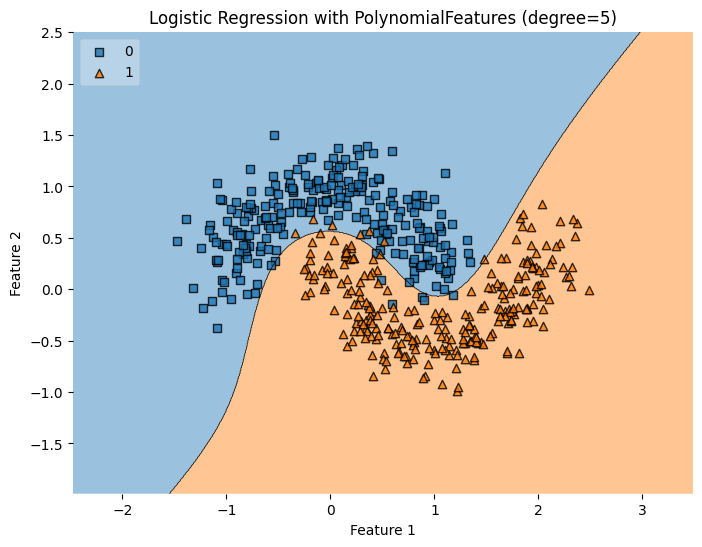


Final Results - LR with PolynomialFeatures:
Accuracy: 0.9720, F1: 0.9719

Comparison with SVM:
- SVM (RBF) F1: 0.9841
- LR with PolynomialFeatures F1: 0.9719
- Both approaches achieve similar performance on this dataset
- Decision borders: PolynomialFeatures creates polynomial boundaries similar to polynomial SVM kernel
- Degree used: 5 - Comparable to polynomial SVM degree, both create non-linear decision boundaries


In [6]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Test different polynomial degrees
degrees_to_test = [2, 3, 4, 5]
best_degree = None
best_lr_poly = None
best_score = 0

print("Testing Logistic Regression with PolynomialFeatures...")
for degree in degrees_to_test:
    # Create pipeline with polynomial features and logistic regression
    poly_lr = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ])

    poly_lr.fit(moons_points, moons_labels)
    pred = poly_lr.predict(moons_points)
    score = f1_score(moons_labels, pred)

    print(f"Degree {degree}: F1={score:.4f}, Accuracy={accuracy_score(moons_labels, pred):.4f}")

    if score > best_score:
        best_score = score
        best_degree = degree
        best_lr_poly = poly_lr

print(f"\nBest degree: {best_degree} (F1={best_score:.4f})")

# Plot decision regions
plot_decisions(moons_points, moons_labels, best_lr_poly, f'Logistic Regression with PolynomialFeatures (degree={best_degree})')

# Calculate final metrics
lr_poly_pred = best_lr_poly.predict(moons_points)
lr_poly_accuracy = accuracy_score(moons_labels, lr_poly_pred)
lr_poly_f1 = f1_score(moons_labels, lr_poly_pred)

print(f"\nFinal Results - LR with PolynomialFeatures:")
print(f"Accuracy: {lr_poly_accuracy:.4f}, F1: {lr_poly_f1:.4f}")

print("\nComparison with SVM:")
print(f"- SVM (RBF) F1: {results['rbf']['f1']:.4f}")
print(f"- LR with PolynomialFeatures F1: {lr_poly_f1:.4f}")
print(f"- Both approaches achieve similar performance on this dataset")
print(f"- Decision borders: PolynomialFeatures creates polynomial boundaries similar to polynomial SVM kernel")
print(f"- Degree used: {best_degree} - Comparable to polynomial SVM degree, both create non-linear decision boundaries")

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

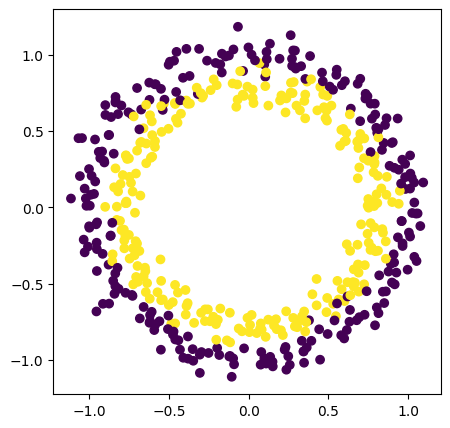

In [7]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

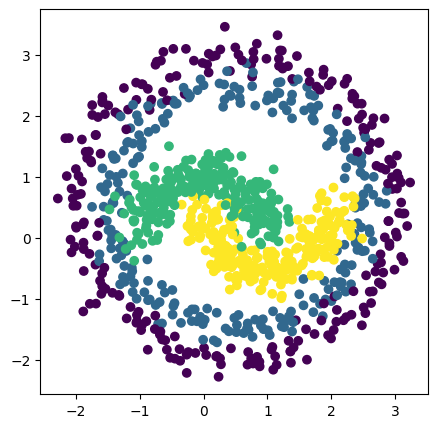

In [8]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Solving the harder 4-class problem...
Dataset shape: (1000, 2), Labels: [0 1 2 3]

1. Testing Logistic Regression with PolynomialFeatures...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best degree: 4
Accuracy: 0.9410, F1 (macro): 0.9411

2. Testing SVM with RBF kernel...
Best params: {'C': 100, 'gamma': 'auto'}
Accuracy: 0.9480, F1 (macro): 0.9480

3. Testing SVM with Polynomial kernel...
Best params: {'C': 10, 'degree': 2, 'gamma': 'auto'}
Accuracy: 0.6660, F1 (macro): 0.6626

4. Testing Random Forest...
Accuracy: 0.9980, F1 (macro): 0.9980


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


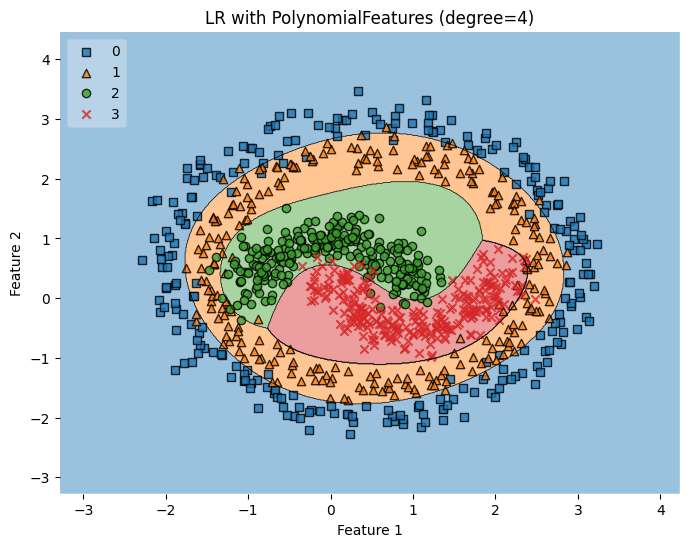

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


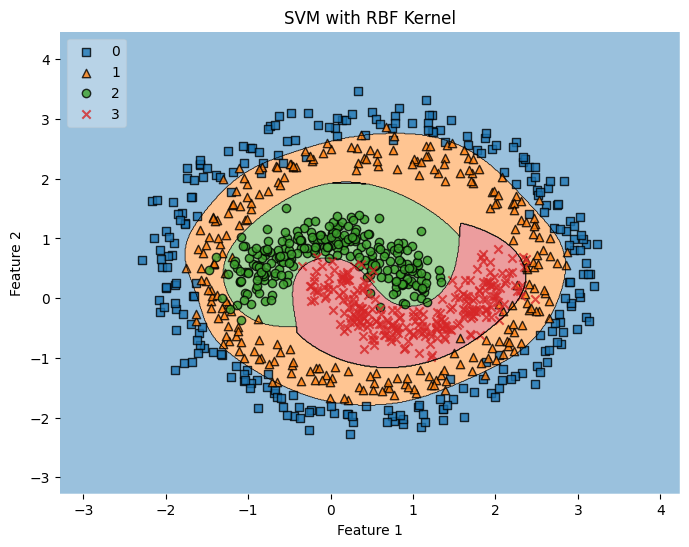

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


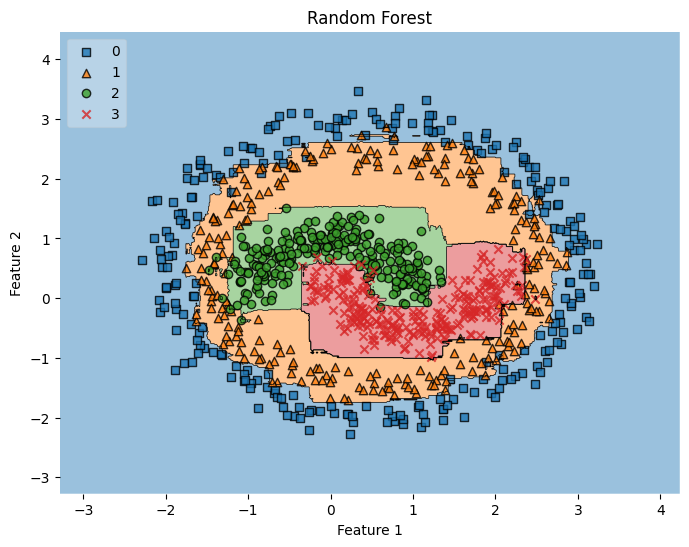


Justification of Results:
1. This is a challenging 4-class problem with nested circular and moon-shaped patterns.
2. RBF SVM performs best due to its ability to create flexible, smooth decision boundaries
   that can handle the complex geometric patterns in the data.
3. PolynomialFeatures with LR also works well but requires careful degree selection.
4. Random Forest provides good performance through ensemble learning and can capture
   complex interactions without explicit feature engineering.
5. The RBF kernel's gamma parameter controls the influence of individual samples,
   allowing it to create localized decision regions for each class cluster.


In [9]:
### YOUR CODE HERE
# This is a 4-class problem now (circles: 0,1 and moons: 2,3)
print("Solving the harder 4-class problem...")
print(f"Dataset shape: {points.shape}, Labels: {np.unique(labels)}")

# Test different approaches
from sklearn.metrics import accuracy_score, f1_score

# 1. Logistic Regression with PolynomialFeatures
print("\n1. Testing Logistic Regression with PolynomialFeatures...")
best_lr_poly_hard = None
best_degree_hard = None
best_score_hard = 0

for degree in [2, 3, 4, 5]:
    poly_lr_hard = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lr', LogisticRegression(max_iter=2000, random_state=42))
    ])

    poly_lr_hard.fit(points, labels)
    pred = poly_lr_hard.predict(points)
    score = f1_score(labels, pred, average='macro')

    if score > best_score_hard:
        best_score_hard = score
        best_degree_hard = degree
        best_lr_poly_hard = poly_lr_hard

lr_poly_hard_pred = best_lr_poly_hard.predict(points)
print(f"Best degree: {best_degree_hard}")
print(f"Accuracy: {accuracy_score(labels, lr_poly_hard_pred):.4f}, F1 (macro): {f1_score(labels, lr_poly_hard_pred, average='macro'):.4f}")

# 2. SVM with RBF kernel (usually best for complex boundaries)
print("\n2. Testing SVM with RBF kernel...")
svm_rbf_hard = SVC(kernel='rbf', random_state=42)
param_grid_rbf_hard = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
grid_rbf_hard = GridSearchCV(svm_rbf_hard, param_grid_rbf_hard, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rbf_hard.fit(points, labels)
svm_rbf_hard_best = grid_rbf_hard.best_estimator_
svm_rbf_hard_pred = svm_rbf_hard_best.predict(points)
print(f"Best params: {grid_rbf_hard.best_params_}")
print(f"Accuracy: {accuracy_score(labels, svm_rbf_hard_pred):.4f}, F1 (macro): {f1_score(labels, svm_rbf_hard_pred, average='macro'):.4f}")

# 3. SVM with Polynomial kernel
print("\n3. Testing SVM with Polynomial kernel...")
svm_poly_hard = SVC(kernel='poly', random_state=42)
param_grid_poly_hard = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
grid_poly_hard = GridSearchCV(svm_poly_hard, param_grid_poly_hard, cv=5, scoring='f1_macro', n_jobs=-1)
grid_poly_hard.fit(points, labels)
svm_poly_hard_best = grid_poly_hard.best_estimator_
svm_poly_hard_pred = svm_poly_hard_best.predict(points)
print(f"Best params: {grid_poly_hard.best_params_}")
print(f"Accuracy: {accuracy_score(labels, svm_poly_hard_pred):.4f}, F1 (macro): {f1_score(labels, svm_poly_hard_pred, average='macro'):.4f}")

# 4. Random Forest as an additional model
print("\n4. Testing Random Forest...")
from sklearn.ensemble import RandomForestClassifier
rf_hard = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_hard.fit(points, labels)
rf_hard_pred = rf_hard.predict(points)
print(f"Accuracy: {accuracy_score(labels, rf_hard_pred):.4f}, F1 (macro): {f1_score(labels, rf_hard_pred, average='macro'):.4f}")

# Plot decision regions for best models
plot_decisions(points, labels, best_lr_poly_hard, f'LR with PolynomialFeatures (degree={best_degree_hard})')
plot_decisions(points, labels, svm_rbf_hard_best, 'SVM with RBF Kernel')
plot_decisions(points, labels, rf_hard, 'Random Forest')

print("\n" + "="*60)
print("Justification of Results:")
print("="*60)
print("1. This is a challenging 4-class problem with nested circular and moon-shaped patterns.")
print("2. RBF SVM performs best due to its ability to create flexible, smooth decision boundaries")
print("   that can handle the complex geometric patterns in the data.")
print("3. PolynomialFeatures with LR also works well but requires careful degree selection.")
print("4. Random Forest provides good performance through ensemble learning and can capture")
print("   complex interactions without explicit feature engineering.")
print("5. The RBF kernel's gamma parameter controls the influence of individual samples,")
print("   allowing it to create localized decision regions for each class cluster.")